In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the median filtered and ema cleaned data CSV file
cu_err_df = pd.read_csv('../data/CU_ERR_clean_SSTEMP_sensor.csv')

#Read the EMA cleaned data CSV file
cu_val_df = pd.read_csv('../data/Valid_clean_SSTEMP_sensor.csv')

#Format time colums
cu_err_df['Time'] = pd.to_datetime(cu_err_df['Time'])
cu_val_df['Time'] = pd.to_datetime(cu_val_df['Time'])

In [4]:
cu_val_df['div'] = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.15, 0.2, 0.3, 0.4, 0.4, 0.4, 0.2, 0.2, 0.3, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3,
                   0.3, 0.3, 0.3, 0.4, 0.4, 0.5, 0.5, 0.3, 0.3, 0.3]

In [9]:
cu_val_df.head()

,State,Time,Device,Unit,div,Upper,Lower
0,20.9,2024-09-12 13:31:28,SSTEMP_sensor,C,0.1,21.0,20.8
1,20.9,2024-09-12 13:31:53,SSTEMP_sensor,C,0.1,21.0,20.8
2,20.9,2024-09-12 13:32:18,SSTEMP_sensor,C,0.1,21.0,20.8
3,20.9,2024-09-12 13:32:43,SSTEMP_sensor,C,0.1,21.0,20.8
4,20.9,2024-09-12 13:33:08,SSTEMP_sensor,C,0.1,21.0,20.8


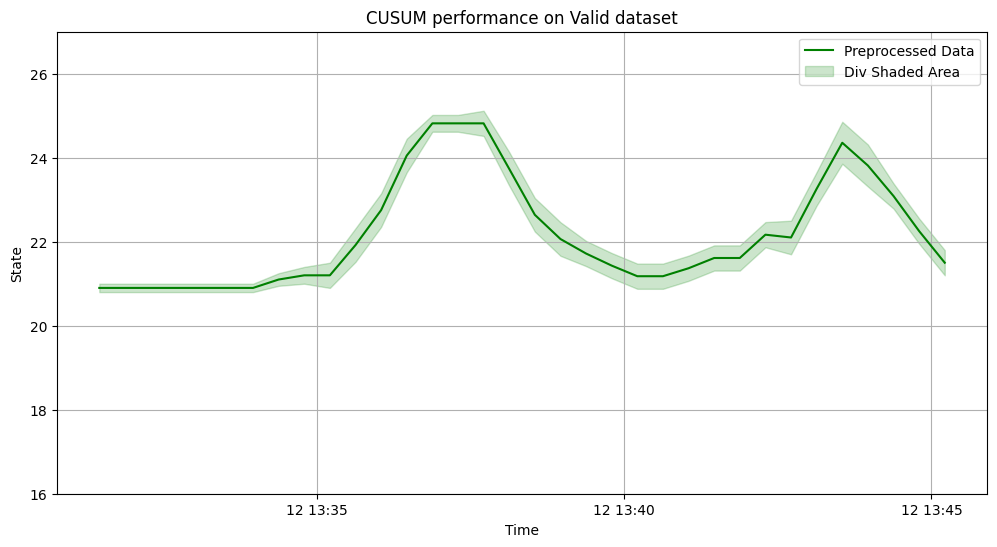

In [6]:
# Calculate the upper and lower bounds using the 'div' column
cu_val_df['Upper'] = cu_val_df['State'] + cu_val_df['div']
cu_val_df['Lower'] = cu_val_df['State'] - cu_val_df['div']

# Create the plot
plt.figure(figsize=(12, 6))

# Plot the main 'State' line
plt.plot(cu_val_df['Time'], cu_val_df['State'], color='green', label='Preprocessed Data')

# Fill the area between the upper and lower bounds using 'div'
plt.fill_between(cu_val_df['Time'], cu_val_df['Lower'], cu_val_df['Upper'], color='green', alpha=0.2, label='Div Shaded Area')
# Adding labels and title
plt.xlabel('Time')
plt.ylabel('State')
plt.title('CUSUM performance on Valid dataset')
plt.legend()  # Show legend to label the line
plt.ylim(16, 27)
plt.grid(True)  # Show grid for better readability

# Show the plot
plt.show()

In [13]:
cu_err_df['div'] = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.15, 0.2, 0.3, 0.4, 0.4, 0.4, 0.2, 0.2, 0.3, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3,
                   0.3, 0.3, 0.3, 0.4, 0.4, 0.5, 0.5]

In [14]:
cu_err_df.head()

,State,Time,Device,Unit,div
0,20.7,2024-09-12 13:02:43,SSTEMP_sensor,C,0.1
1,22.0,2024-09-12 13:03:08,SSTEMP_sensor,C,0.1
2,25.0,2024-09-12 13:03:33,SSTEMP_sensor,C,0.1
3,25.0,2024-09-12 13:03:58,SSTEMP_sensor,C,0.1
4,23.0,2024-09-12 13:04:23,SSTEMP_sensor,C,0.1


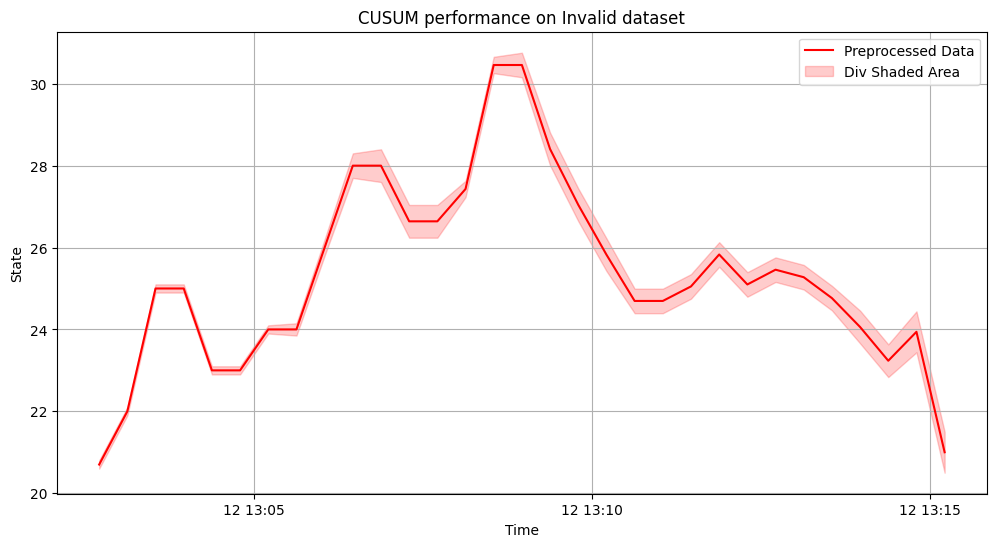

In [15]:
# Calculate the upper and lower bounds using the 'div' column
cu_err_df['Upper'] = cu_err_df['State'] + cu_err_df['div']
cu_err_df['Lower'] = cu_err_df['State'] - cu_err_df['div']

# Assuming 'cu_val_df' has 'Time' and 'State' columns
plt.figure(figsize=(12, 6))

# Plot 'cu_val_df' with 'Time' on the x-axis and 'State' on the y-axis
plt.plot(cu_err_df['Time'], cu_err_df['State'], color='red', label='Preprocessed Data')
plt.fill_between(cu_err_df['Time'], cu_err_df['Lower'], cu_err_df['Upper'], color='red', alpha=0.2, label='Div Shaded Area')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('State')
plt.title('CUSUM performance on Invalid dataset')
plt.legend()  # Show legend to label the line

plt.grid(True)  # Show grid for better readability

# Show the plot
plt.show()